In [8]:
import datetime
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import date
from dateutil.relativedelta import relativedelta
from jugaad_data.nse import NSELive, index_raw, index_csv, stock_df

In [63]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
>>> import jugaad_data as jd
>>> import yfinance as yf
>>> print(f'jugaad_data version: {jd.__version__}')

>>> print(f'yfinance version: {yf.__version__}')

jugaad_data version: 0.24
yfinance version: 0.2.28


## 1.  Nifty data 

### 1.1 Live data

In [6]:
n = NSELive()
nifty_data = n.live_index('NIFTY 50')
print(nifty_data['name'], nifty_data['timestamp'], nifty_data['data'][0]['lastPrice'])

NIFTY 50 17-Aug-2023 13:36:27 19355.7


### 1.2. Downloading historical NIFTY data

#### 1.2.1. Fetching historical data

In [42]:
import datetime
import pandas as pd
from dateutil.relativedelta import relativedelta
from jugaad_data.nse import index_raw

# Get from and to dates
to_date = datetime.date.today()
from_date = to_date - relativedelta(years=3)
print(from_date, to_date)

# Fetch the index data 
raw_index_data = index_raw(symbol="NIFTY 50", from_date=from_date, to_date=to_date)

2020-08-17 2023-08-17


#### 1.2.2. Converting into dataframe

In [49]:
def convert_to_date(date_str):
    date_obj = datetime.datetime.strptime(date_str, '%d %b %Y')
    return date_obj

nifty_index_historical_df = pd.DataFrame(raw_index_data)
nifty_index_historical_df['HistoricalDate'] = nifty_index_historical_df['HistoricalDate'].apply(convert_to_date)
nifty_index_historical_df = nifty_index_historical_df.sort_values('HistoricalDate').reset_index(drop=True)
nifty_index_historical_df

,Index Name,INDEX_NAME,HistoricalDate,OPEN,HIGH,LOW,CLOSE
0,Nifty 50,NIFTY 50,2020-08-17,11248.9,11267.1,11144.5,11247.10
1,Nifty 50,NIFTY 50,2020-08-17,11248.9,11267.1,11144.5,11247.10
2,Nifty 50,NIFTY 50,2020-08-18,11259.8,11401.7,11253.15,11385.35
3,Nifty 50,NIFTY 50,2020-08-18,11259.8,11401.7,11253.15,11385.35
4,Nifty 50,NIFTY 50,2020-08-19,11452.15,11460.35,11394.1,11408.40
...,...,...,...,...,...,...,...
801,Nifty 50,NIFTY 50,2023-08-11,19554.25,19557.75,19412.75,19428.30
802,Nifty 50,NIFTY 50,2023-08-11,19554.25,19557.75,19412.75,19428.30
803,Nifty Midcap150 Momentum 50,NIFTY MIDCAP150 MOMENTUM 50,2023-08-14,-,-,-,38545.35
804,Nifty 50,NIFTY 50,2023-08-14,19383.95,19465.85,19257.90,19434.55


#### 1.2.3. Doing data processing -- filtering and dropping duplicates

In [50]:
nifty_index_historical_df = nifty_index_historical_df.drop_duplicates()
nifty_index_historical_df = nifty_index_historical_df.loc[nifty_index_historical_df.loc[:, 'Index Name'] == 'Nifty 50']
nifty_index_historical_df

,Index Name,INDEX_NAME,HistoricalDate,OPEN,HIGH,LOW,CLOSE
0,Nifty 50,NIFTY 50,2020-08-17,11248.9,11267.1,11144.5,11247.10
2,Nifty 50,NIFTY 50,2020-08-18,11259.8,11401.7,11253.15,11385.35
4,Nifty 50,NIFTY 50,2020-08-19,11452.15,11460.35,11394.1,11408.40
6,Nifty 50,NIFTY 50,2020-08-20,11317.45,11361.45,11289.8,11312.20
8,Nifty 50,NIFTY 50,2020-08-21,11409.65,11418.5,11362.2,11371.60
...,...,...,...,...,...,...,...
792,Nifty 50,NIFTY 50,2023-08-09,19578.80,19645.50,19467.50,19632.55
795,Nifty 50,NIFTY 50,2023-08-10,19605.55,19623.60,19495.40,19543.10
799,Nifty 50,NIFTY 50,2023-08-11,19554.25,19557.75,19412.75,19428.30
804,Nifty 50,NIFTY 50,2023-08-14,19383.95,19465.85,19257.90,19434.55


#### 1.2.4 Stitching it all together

In [51]:
import datetime
import pandas as pd
from dateutil.relativedelta import relativedelta
from jugaad_data.nse import index_raw

def convert_to_date(date_str):
    date_obj = datetime.datetime.strptime(date_str, '%d %b %Y')
    return date_obj

# Get from and to dates
to_date = datetime.date.today()
from_date = to_date - relativedelta(years=3)
print(from_date, to_date)

# Fetch the index data 
raw_index_data = index_raw(symbol="NIFTY 50", from_date=from_date, to_date=to_date)

# Converting into dataframe 
nifty_index_historical_df = pd.DataFrame(raw_index_data)
nifty_index_historical_df['HistoricalDate'] = nifty_index_historical_df['HistoricalDate'].apply(convert_to_date)
nifty_index_historical_df = nifty_index_historical_df.sort_values('HistoricalDate').reset_index(drop=True)
nifty_index_historical_df = nifty_index_historical_df.drop_duplicates()
nifty_index_historical_df = nifty_index_historical_df.loc[nifty_index_historical_df.loc[:, 'Index Name'] == 'Nifty 50']
nifty_index_historical_df

2020-08-17 2023-08-17


,Index Name,INDEX_NAME,HistoricalDate,OPEN,HIGH,LOW,CLOSE
0,Nifty 50,NIFTY 50,2020-08-17,11248.9,11267.1,11144.5,11247.10
2,Nifty 50,NIFTY 50,2020-08-18,11259.8,11401.7,11253.15,11385.35
4,Nifty 50,NIFTY 50,2020-08-19,11452.15,11460.35,11394.1,11408.40
6,Nifty 50,NIFTY 50,2020-08-20,11317.45,11361.45,11289.8,11312.20
8,Nifty 50,NIFTY 50,2020-08-21,11409.65,11418.5,11362.2,11371.60
...,...,...,...,...,...,...,...
792,Nifty 50,NIFTY 50,2023-08-09,19578.80,19645.50,19467.50,19632.55
795,Nifty 50,NIFTY 50,2023-08-10,19605.55,19623.60,19495.40,19543.10
799,Nifty 50,NIFTY 50,2023-08-11,19554.25,19557.75,19412.75,19428.30
804,Nifty 50,NIFTY 50,2023-08-14,19383.95,19465.85,19257.90,19434.55


#### 1.2.5 Making the code more readable

In [54]:
import datetime
import pandas as pd
from dateutil.relativedelta import relativedelta
from jugaad_data.nse import index_raw

n_years = 3 # Parameter for historical years

def convert_to_date(date_str):
    date_obj = datetime.datetime.strptime(date_str, '%d %b %Y')
    return date_obj

# Get from and to dates
to_date = datetime.date.today()
from_date = to_date - relativedelta(years=n_years)
print(from_date, to_date)

# Fetch the index data 
raw_index_data = index_raw(symbol="NIFTY 50", from_date=from_date, to_date=to_date)

# Converting into dataframe and processing the data
nifty_historical_df = (pd.DataFrame(raw_index_data)\
                            .assign(HistoricalDate=lambda x: x['HistoricalDate'].apply(convert_to_date))\
                            .sort_values('HistoricalDate')\
                            .drop_duplicates()\
                            .loc[lambda x: x['Index Name'] == 'Nifty 50']\
                            .reset_index(drop=True))
nifty_historical_df

2020-08-17 2023-08-17


,Index Name,INDEX_NAME,HistoricalDate,OPEN,HIGH,LOW,CLOSE
0,Nifty 50,NIFTY 50,2020-08-17,11248.9,11267.1,11144.5,11247.10
1,Nifty 50,NIFTY 50,2020-08-18,11259.8,11401.7,11253.15,11385.35
2,Nifty 50,NIFTY 50,2020-08-19,11452.15,11460.35,11394.1,11408.40
3,Nifty 50,NIFTY 50,2020-08-20,11317.45,11361.45,11289.8,11312.20
4,Nifty 50,NIFTY 50,2020-08-21,11409.65,11418.5,11362.2,11371.60
...,...,...,...,...,...,...,...
741,Nifty 50,NIFTY 50,2023-08-09,19578.80,19645.50,19467.50,19632.55
742,Nifty 50,NIFTY 50,2023-08-10,19605.55,19623.60,19495.40,19543.10
743,Nifty 50,NIFTY 50,2023-08-11,19554.25,19557.75,19412.75,19428.30
744,Nifty 50,NIFTY 50,2023-08-14,19383.95,19465.85,19257.90,19434.55


#### 1.2.6.  Plotting the nifty historical data and a trendline

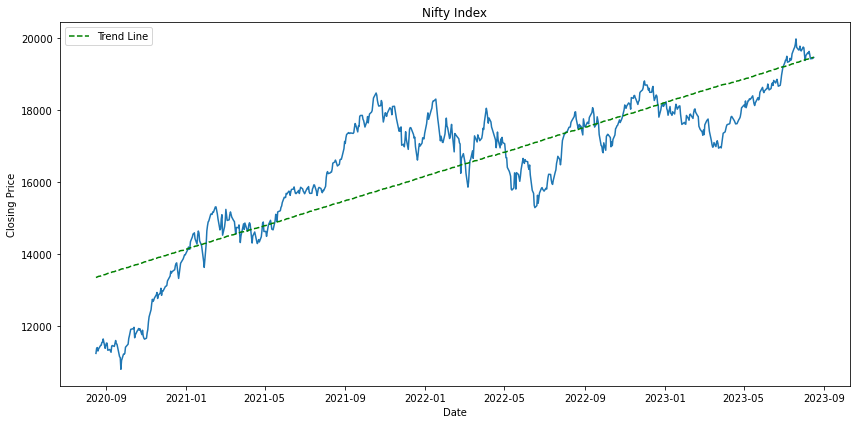

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(12, 6))

nifty_historical_df['CLOSE'] = nifty_historical_df['CLOSE'].astype('float')

# Plot the historical Nifty data
plt.plot(nifty_historical_df['HistoricalDate'].values, nifty_historical_df['CLOSE'].values)

# Calculate and plot the trend line
x_values = np.arange(len(nifty_historical_df)).reshape(-1, 1)
y_values = nifty_historical_df['CLOSE'].values.reshape(-1, 1)
regressor = LinearRegression().fit(x_values, y_values)
trend_line = regressor.predict(x_values)
plt.plot(nifty_historical_df['HistoricalDate'].values, trend_line, linestyle='--', color='g', label='Trend Line')

# Set the title and labels
plt.title('Nifty Index')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


### 2. Stocks & ETFs

#### 2.1. Using `jugaad_data`

In [69]:
from jugaad_data.nse import NSELive
n = NSELive()
tata_motors_price, mon100_etf = n.stock_quote('TATAMOTORS')['priceInfo']['lastPrice'], n.stock_quote('MON100')['priceInfo']['lastPrice']
tata_motors_price, mon100_etf

(613.35, 120.4)

In [65]:
from jugaad_data.nse import stock_df
tata_motors_stock_df = stock_df(symbol='TATAMOTORS', 
                                from_date=date(2023,1,1), 
                                to_date=date(2023,1,5), 
                                series="EQ")
tata_motors_stock_df

,DATE,SERIES,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CLOSE,VWAP,52W H,52W L,VOLUME,VALUE,NO OF TRADES,SYMBOL
0,2023-01-05,EQ,387.900,388.750,382.500,385.600,387.000,386.900,386.130,528.500,366.200,10443908,4032691650.750,130918,TATAMOTORS
1,2023-01-04,EQ,394.800,394.800,385.000,393.900,385.750,385.600,387.300,528.500,366.200,16121049,6243666263.200,172074,TATAMOTORS
2,2023-01-03,EQ,396.000,398.350,393.000,394.800,393.900,393.900,395.210,528.500,366.200,9431220,3727287418.500,133270,TATAMOTORS
3,2023-01-02,EQ,392.500,396.000,391.000,387.950,395.000,394.800,394.170,528.500,366.200,10501357,4139354568.300,142685,TATAMOTORS


#### 2.2. Using `yfinance`

In [67]:
import yfinance as yf

# end date data is excluded 
stock_data = yf.download('TATAMOTORS.NS', start='2023-01-01', end='2023-01-06')
stock_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,392.500,396.000,391.000,394.800,393.573,10501357
2023-01-03,396.000,398.350,393.000,393.900,392.676,9431220
2023-01-04,394.800,394.800,385.000,385.600,384.402,16121049
2023-01-05,387.900,388.750,382.500,386.900,385.698,10443908


In [68]:
info = yf.Ticker('TATAMOTORS.NS').info
info['sharesOutstanding'], info['floatShares'], info['currentPrice']

(3321860096, 2129548249, 613.75)

In [70]:
info

{'address1': 'Bombay House',
 'address2': '24, Homi Mody Street',
 'city': 'Mumbai',
 'zip': '400001',
 'country': 'India',
 'phone': '91 22 6665 8282',
 'fax': '91 22 6665 7799',
 'website': 'https://www.tatamotors.com',
 'industry': 'Auto Manufacturers',
 'industryDisp': 'Auto Manufacturers',
 'sector': 'Consumer Cyclical',
 'sectorDisp': 'Consumer Cyclical',
 'longBusinessSummary': 'Tata Motors Limited designs, develops, manufactures, and sells various automotive vehicles. The company offers passenger cars; sports utility vehicles; intermediate and light commercial vehicles; small, medium, and heavy commercial vehicles; defense vehicles; pickups, wingers, buses, and trucks; and electric vehicles, as well as related spare parts and accessories. It also manufactures engines for industrial and marine applications, and aggregates comprising axles and transmissions for commercial vehicles; and factory automation equipment, as well as provides information technology and vehicle financing 